In [21]:
'''Load Dataset'''
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sktime.datasets import load_basic_motions
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
from sktime.utils.plotting import plot_series
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import matplotlib.pyplot as plt 
import warnings
from data.DataLoader import load_UEA_dataset
warnings.filterwarnings('ignore')




In [22]:
dataset='UWaveGestureLibrary'
train_x,train_y, test_x, test_y=load_UEA_dataset(dataset)


In [23]:
import sklearn
import torch
from models.CNN_TSNet import UCRDataset
from models.ResNet import ResNetBaseline, fit, get_all_preds
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
import pandas as pd
import pickle
enc1=pickle.load(open(f'./models/{dataset}/OneHotEncoder.pkl','rb'))
test_y=enc1.transform(test_y.reshape(-1,1))
train_y=enc1.transform(train_y.reshape(-1,1))

n_pred_classes =train_y.shape[1]
 
train_dataset = UCRDataset(train_x.astype(np.float64),train_y.astype(np.int64))
test_dataset = UCRDataset(test_x.astype(np.float64),test_y.astype(np.int64))
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=16,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=1,shuffle=False)

model = ResNetBaseline(in_channels=train_x.shape[-2], num_pred_classes=n_pred_classes)

In [24]:
model.load_state_dict(torch.load(f'./models/{dataset}/ResNet'))
observation_01, label_01 = test_dataset[0]

In [25]:
from TSEvo.CounterfactualExplanation import Explanation
exp =Explanation(model= model,data=(test_x,test_y), backend='torch')

y was one Hot Encoded


In [26]:
#pop,logbook=exp.explain_instance(observation_01,np.array([[1,0]]))
pop,logbook=exp.explain_instance(observation_01,np.array([label_01]),transformer='mutate_both')#, transformer='frequency_band_mapping') 

Reference Set not Target
y (320,)
y [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
original (1, 8)
0
ReferenceSet class [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

In [27]:
# extract statistics:
meanYDistance = logbook.chapters['stats_y_distance'].select("min")
#logbook.chapters['stats_y_distance','stats_x_distance','stats_changed_features','stats_gower'].select("avg")
meanXDistance = logbook.chapters['stats_x_distance'].select("min")
meanChanged = logbook.chapters['stats_changed_features'].select("min")
meanGower = logbook.chapters['stats_gower'].select("min")

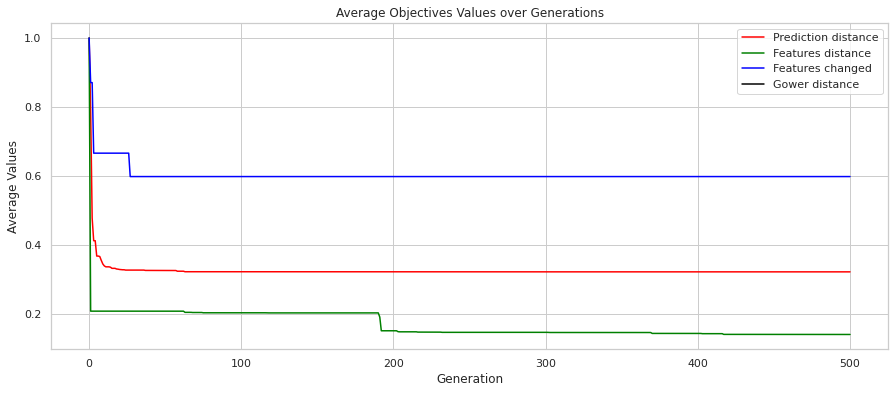

In [28]:
# plot statistics:
sns.set_style("whitegrid")
plt.plot(meanYDistance, color='red', label='Prediction distance')
plt.plot(meanXDistance, color='green', label='Features distance')
plt.plot(meanChanged, color='blue', label='Features changed')
plt.plot(meanGower, color='black', label='Gower distance')
plt.xlabel('Generation')
plt.ylabel('Average Values')
plt.title('Average Objectives Values over Generations')
plt.set_loglevel
plt.legend()
plt.show() 

(315,)
(315,)
-1.8676326855336436
-1.8437


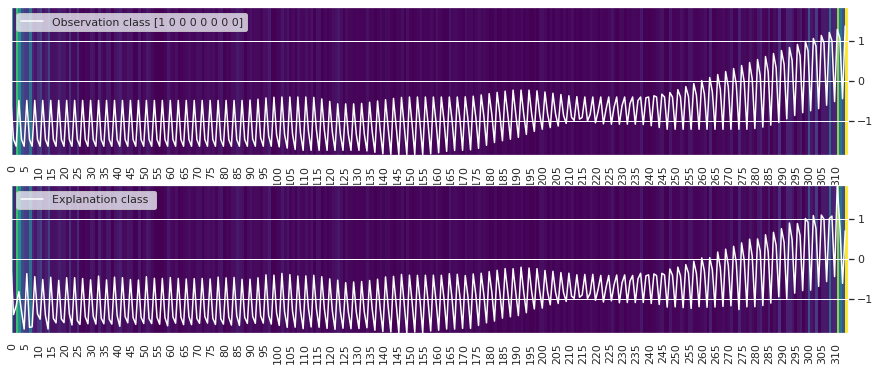

(315,)
(315,)
-2.5486005264362865
-0.97168


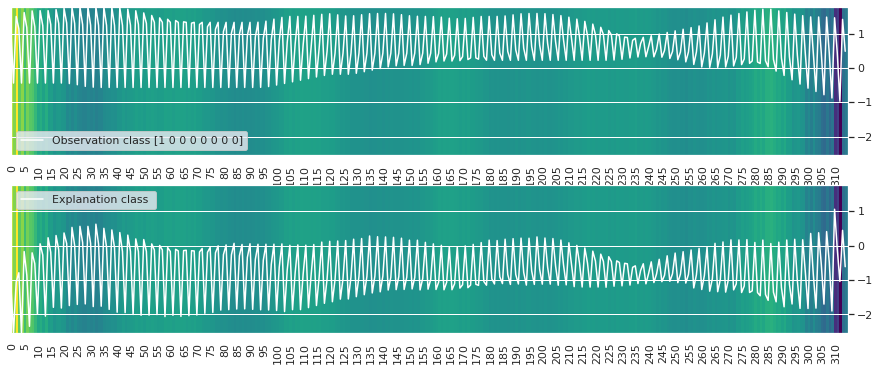

(315,)
(315,)
-0.8250438592752082
-1.8659


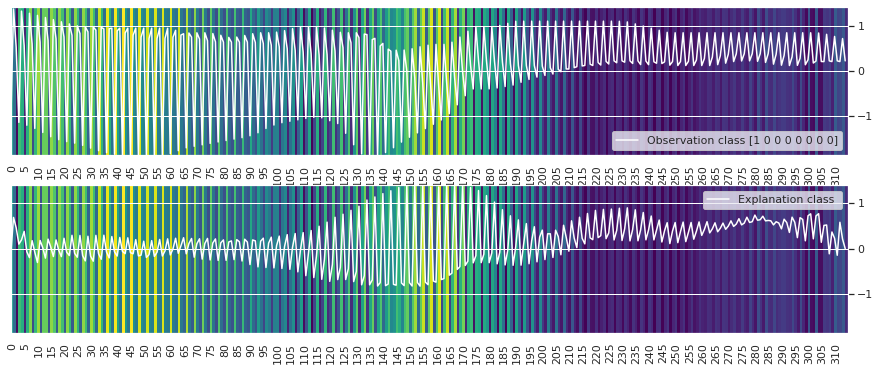

In [29]:
from evaluation.Plots import plot_CF_Original

i=0
for line in np.array(pop[0]):
    plot_CF_Original(line, observation_01[i],label_01)
    i=i+1